# ФИНАНСОВЫЕ ПРИЛОЖЕНИЯ

Финансовые рынки считаются праматерью всех временных рядов. Оплачивая доступ к данным о торговых сделках на высокотехнологичных биржевых площадках, будьте готовы обрабатывать терабайтные потоки данных, на что может уйти несколько дней даже с учетом преимуществ современного компьютерного оборудования и технологий распараллеливания вычислений.

Высокочастотные трейдеры — новые и печально известные члены финансового сообщества, обменивающиеся информацией и знаниями, полученными в результате анализа временных рядов, на микросекундном уровне. Несмотря ни на что, традиционные финансовые организации, ориентирующиеся на работу с долгосрочными временными рядами, собранными в течение нескольких часов, дней или даже месяцев, продолжают добиваться успеха в биржевых торгах, демонстрируя, что анализ временных рядов финансовых данных можно успешно проводить множеством способов и во временных масштабах, охватывающих несколько порядков — от миллисекундного до годичного.

Естественно параллельными называются задачи обработки данных, в которых результаты обработки одного сегмента данных никоим образом не зависят от значений другого сегмента данных. В таких случаях задачи анализа данных легко выполнять параллельно, а не последовательно, используя очевидные преимущества многоядерных или многомашинных вычислений.
Рассмотрим, например, задачу вычисления среднесуточной доходности определенной акции, регистрируемой раз в минуту. Каждый день можно рассматривать отдельно, а несколько дней — параллельно.

Напротив, вычисление экспоненциально взвешенного скользящего среднего значения дневной волатильности не является естественно параллельным процессом, поскольку значение для определенного дня зависит от значений за предыдущие дни. Иногда задачи, которые не являются естественно параллельными, все же могут выполняться частично параллельно, что зависит от их условий.
Рассмотрим классический пример анализа временных рядов для прогнозирования доходности фондового индекса S&P 500 для следующего биржевого дня.






***Получение и изучение финансовых данных***

Получить финансовые данные может быть чрезвычайно сложно, особенно для строго заданного инструмента или временного разрешения. В таких случаях данные приходится покупать. Однако исторические данные о ценах на акции широко предоставляются различными службами.

• Yahoo Finance. Хотя компания Yahoo прекратила обслуживание программного интерфейса публикации финансовых данных (Кстати, вследствие этого в сообществах R и Python многие программы утратили работоспособность), ежедневные исторические биржевые данные все еще доступны для загрузки.

• Новые игроки на финансовом рынке, такие как Alpha Vantage  и Quandl, предоставляют как исторические, так и потоковые данные о ценах на акции.

Мы ограничимся анализом общедоступных ежедневных данных о стоимости биржевого индекса S&P 500, предоставляемых компанией Yahoo. Будем использовать данные о котировках индекса S&P 500 за период с 1990 по 2019 год. Следующий код позволяет ознакомиться со столбцами загруженного набора данных и строит график стоимости индекса на конец биржевого дня, с которого начинает анализ данных (рис. 13.1).


In [1]:
##использовала для того, чтобы увидеть все столбцы файла, так как был указан файл Dat, а такого нет
import pandas as pd
df = pd.read_csv('sp500.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-06-19,524.650024,527.419983,524.590027,525.869995,525.869995,93655400
1,2017-06-20,528.049988,528.539978,520.880005,520.880005,520.880005,90467100
2,2017-06-21,519.599976,520.940002,515.330017,520.479980,520.479980,90644200
3,2017-06-22,519.200012,519.419983,516.239990,519.390015,519.390015,91882700
4,2017-06-23,518.320007,519.619995,516.099976,519.500000,519.500000,98274300


In [2]:
df.tail()



,Date,Open,High,Low,Close,Adj Close,Volume
1276,2022-06-13,670.760010,671.849976,658.950012,661.539978,661.539978,102000
1277,2022-06-14,667.679993,668.750000,652.869995,652.869995,652.869995,90600
1278,2022-06-15,656.559998,665.270020,650.270020,663.210022,663.210022,86900
1279,2022-06-16,658.380005,660.419983,636.500000,638.340027,638.340027,94900
1280,2022-06-17,658.380005,660.419983,636.500000,638.340027,638.340027,94900


Можно видеть, что значения в начале и в конце периода дат, охватываемого файлом CSV, заметно различаются. Изменение значений становится более очевидным при построении полного временного ряда цены на момент закрытия (рис. 13.2) по сравнению с выборками из фрейма данных.

На рис. 13.2 показано, что временной ряд не является стационарным. Также на графике представлены разные “режимы” ценообразования. Исследуя причины возникновения таких режимов, четко просматриваемых на графике, финансовые аналитики стремятся разработать модели, описывающие временное смещение цен на акции. Похоже на то, что поведение данных описывается несколькими разными режимами, хотя у нас нет четкого понимания, в какие временные моменты заканчиваются одни и начинаются другие режимы (Обратите внимание, что индекс S&P 500 довольно сложный, потому что рассчитывается через стоимость совокупности большого количества акций с периодически корректируемыми весами и полностью проприетарным коэффициентом, который также используется для деления средневзвешенных акций. По этой причине глубокое знание предметной области и понимание того, как различные действия, предпринимаемые компаниями, могут повлиять на цены акций и весовые коэффициенты в индексе S&P 500, крайне важны для понимания долгосрочного поведения котировок, которое продемонстрировано на рис. 13.2.).


Рис. 13.1. Начальный и конечный фрагменты файла CSV с исходными данными. Обратите внимание, насколько сильно изменились значения с 1990 по 2019 год: такая ситуация не вызовет удивления только у финансовых специалистов

<Axes: xlabel='Date'>

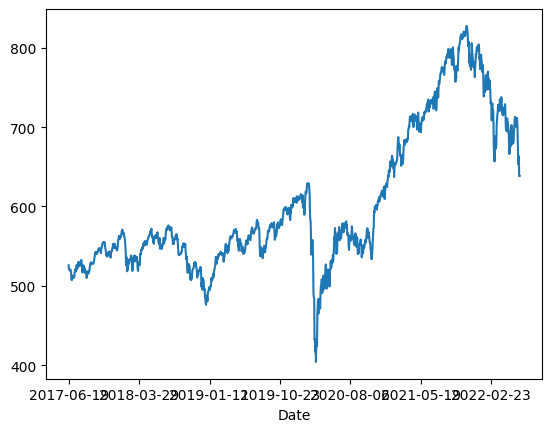

In [3]:
df.index = df.Date
df.Close.plot()

Рис. 13.2. Дневные цены индекса S&P 500 на момент закрытия торгов не образуют стационарный временной ряд

Вариативность положения точек и режимов на графике предполагает, что исходный набор данных целесообразно разделить на несколько частичных наборов, каждый из которых будет моделироваться отдельно. Однако нам нужно сохранить полностью все доступные данные, поскольку дневные данные не дают много точек даже за несколько десятилетий. Следует хорошо подумать, будет ли оправданным хранение всех данных в задачах составления прогноза всего на один день вперед.

Нужно выяснить, поможет ли нормализация сопоставить данные из разных периодов времени. Давайте изучим разнообразие масштабированных недельных цен на момент закрытия торгов за три разных десятилетия, содержащихся во временном ряду (рис. 13.3).


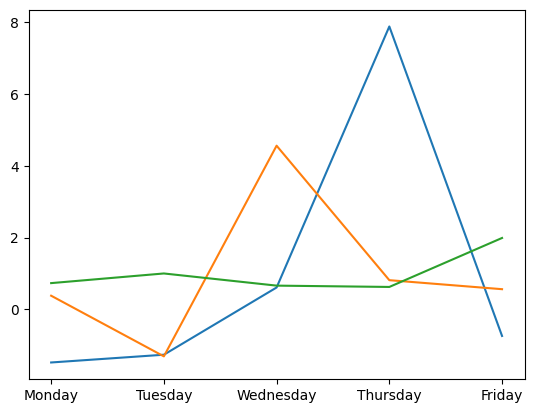

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Пример данных (замените этот блок на ваш реальный код загрузки данных)
date_rng = pd.date_range(start='2018-05-01', end='2022-05-31', freq='B')
df = pd.DataFrame(date_rng, columns=['date'])
df['Close'] = np.random.randn(len(df))


# Преобразование индекса в тип datetime
df.set_index('date', inplace=True)

## 1990
vals = df['2018-05-07':'2018-05-11'].Close.values
mean_val = np.mean(vals)
plt.plot([1, 2, 3, 4, 5], vals / mean_val)
plt.xticks([1, 2, 3, 4, 5], labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])

## 2000
vals = df['2020-05-04':'2020-05-08'].Close.values
mean_val = np.mean(vals)
plt.plot([1, 2, 3, 4, 5], vals / mean_val)
plt.xticks([1, 2, 3, 4, 5], labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])

## 2018
vals = df['2022-05-09':'2022-05-13'].Close.values
mean_val = np.mean(vals)
plt.plot([1, 2, 3, 4, 5], vals / mean_val)
plt.xticks([1, 2, 3, 4, 5], labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])

plt.show()


Графики отображают цены на момент закрытия за три недели для трех разных десятилетий, каждое из которых масштабировано по отношению к среднему недельному значению, как реализовано в предыдущем коде. Относительные (процентные) изменения дневной цены в течение недели кажутся примерно одинаковыми для всех анализируемых десятилетий.

Графики содержат обнадеживающие сведения. Хотя средние значения и дисперсия цены на момент закрытия существенно изменяются во времени, после нормализации данных к среднему значению для заданного десятилетия графики демонстрируют одинаковое поведение показателей в разные периоды времени.

Учитывая этот факт, попытаемся найти способ сделать данные за весь период времени достаточно однородными, чтобы их можно было использовать для полноценного обучения модели. Попробуем найти способ преобразования, который сохраняет финансовую значимость данных и в то же время позволяет сопоставлять их за весь анализируемый период времени.

Вычислим ежедневную доходность, т.е. изменение цены с начала по конец каждого торгового дня (рис. 13.4).


In [5]:
print(df.columns)


Index(['Close'], dtype='object')


<Axes: xlabel='date'>

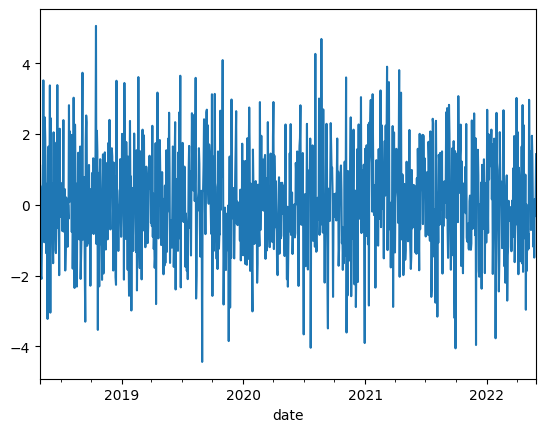

In [6]:
df['Open'] = np.random.randn(len(df))
df['Return'] = df['Close'] - df['Open']
df['Return'].plot()





Как показано на рис. 13.4, одного этого недостаточно, чтобы сделать данные сопоставимыми. Также нужно найти способ нормализовать данные без упреждения, чтобы значения, подаваемые на вход и выход модели, были более однородными в течение интересующего периода времени. О том, как это можно сделать, речь пойдет в следующем разделе.

 Рис. 13.3. Масштабированные дневные цены на момент закрытия индекса S&P 500 в мае 1990, 2000 и 2018 годо

Рис. 13.4. Дневная доходность во времени имеет почти нулевое математическое ожидание, но ее дисперсия в разные периоды времени заметно изменяется. Такое поведение стало мотиватором разработки моделей, подобных GARCH, кратко описанной в разделе 5

***Финансовые рынки как случайное блуждание***

#### --- в R notebook

***Предварительная обработка финансовых данных для глубокого обучения***

Предварительная обработка данных будет выполняться в три этапа.
1. Формирование новых, экономически значимых величин из исходных данных.
2. Вычисление экспоненциально взвешенного скользящего среднего и дисперсии целевых величин для масштабирования данных без упреждения.
3. Упаковка полученных результатов в формат, подходящий для целевой модели глубокого обучения, для обеспечения целостности данных.


***Анализ финансовых временных рядов — отдельная научная дисциплина***

Анализ финансовых временных рядов — это отдельная научная дисциплина. Тысячи ученых прилагают максимум усилий, чтобы понять механизм функционирования финансовых рынков, как с целью максимизации прибыли, так и с точки зрения оптимального регулирования. Существует множество статистических моделей, разработанных для описания отдельных сложных финансовых механизмов, с которыми вам уже доводилось встречаться, например, GARCH. Если вы планируете применять методы статистического и машинного обучения к моделированию финансовых временных рядов, то обязательно познакомьтесь с историей финансовой математики и основными классами наиболее распространенных моделей.

***Добавление новых величин к исходным данным***

В предыдущем разделе мы уже вычисляли ежедневную доходность. Другой количественный показатель, который можно вычислить по исходным данным, — это ежедневная волатильность, которая представляет собой разницу между самой высокой и самой низкой ценами, зарегистрированными в течение торгового дня. Она легко рассчитывается по необработанным данным (рис. 13.6).

In [7]:
import pandas as pd

# Загрузка CSV-файла
df = pd.read_csv('sp500.csv')

# Вывод имен столбцов
print(df.columns)


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


<Axes: >

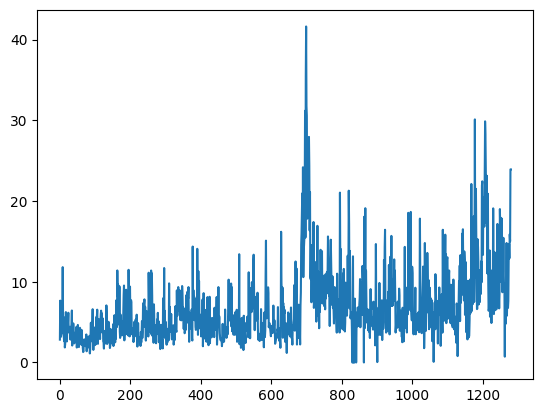

In [8]:
df['DailyVolatility'] = df.High - df.Low
df['DailyVolatility'].plot()



Как ежедневная доходность, так и ежедневная волатильность представлены нестационарными временными рядами. Это еще раз подтверждает, что их нужно соответствующим образом масштабировать перед дальнейшей обработкой, чтобы исключить упреждение.

Рис. 13.6. Ежедневная волатильность — это временной ряд положительных значений (по определению), характеризующийся сильно изменяющейся дисперсией в разных точках временного ряда S&P 500

***Масштабирование целевых величин без упреждения***

Нашей целью будет прогнозирование дневной доходности на один день вперед. Перечислим основные интересующие нас величины.
• Предыдущая дневная доходность.
• Предыдущая дневная волатильность.
• Предыдущий дневной объем торгов.
Для масштабирования этих величин будем вычитать из каждой из них экспоненциально взвешенное скользящее среднее, а затем делить полученную разность на экспоненциально взвешенное стандартное отклонение. Наше предыдущее исследование еженедельных данных показало, что при соответствующей предварительной обработке многие целевые показатели будут формировать стационарные временные ряды.
Сначала вычислим экспоненциально взвешенное скользящее среднее каждого столбца в фрейме данных и построим график экспоненциально взвешенного скользящего среднего (AWMA) дневной волатильности (рис. 13.7). Сравните его с графиком на рис. 13.6. Он имеет намного более гладкий характер из-за усреднения.
Обратите внимание, что форма графика описывается параметром, который можно рассматривать как гиперпараметр целевой модели даже на этапе предварительной обработки данных: период полураспада экспоненциального сглаживания. Поведение модели, безусловно, сильно зависит от значения этого параметра.


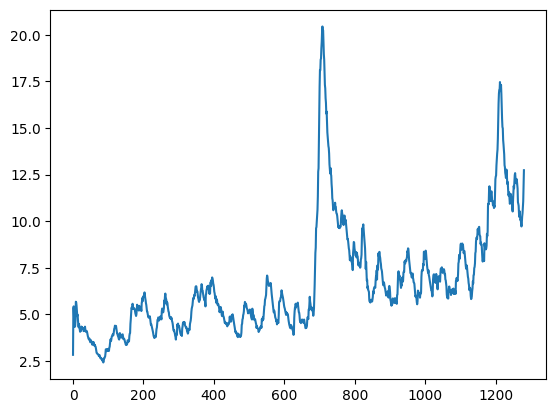

In [9]:
ewdf = df['DailyVolatility'].ewm(halflife = 10).mean()
import matplotlib.pyplot as plt

#plot sales and 4-day exponentially weighted moving average
plt.plot(ewdf, label='DailyVolatility')



Теперь, используя это значение, а также экспоненциально взвешенную скользящую дисперсию, вычисленную здесь же, можно переходить к масштабированию интересующих значений, чтобы получить ряды, которые демонстрируют более согласованное временное поведение (рис. 13.8).


Рис. 13.7. График экспоненциально взвешенного скользящего среднего ежедневной волатильности имеет более гладкий характер, чем график исходных данных, но все еще не представлен стационарным временным рядом


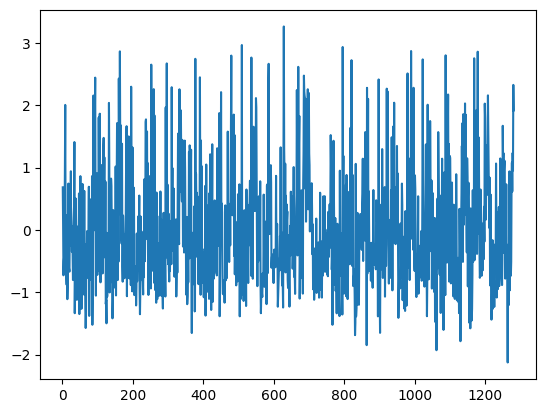

In [10]:
# Вычисление экспоненциально взвешенной скользящей дисперсии
vewdf = df['DailyVolatility'].ewm(halflife = 10).var()

# Масштабирование по среднему и нормализация
# Построение графика
plt.plot((df.DailyVolatility-ewdf)/vewdf**0.5, label='DailyVolatility')




Рис. 13.8. Нормализация данных с помощью экспоненциально взвешенного среднего значения и дисперсии позволяет получить более однородные временные ряды по сравнению со значениями, полученными за период с 1990 по 2019 год


Преобразуем все три целевых входных ряда в их масштабированные версии, воспользовавшись таким кодом


In [11]:
print(df.columns)



Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'DailyVolatility'],
      dtype='object')


In [12]:
# Предположим, что 'DailyVolatility' уже вычислен и добавлен в DataFrame
# Если необходимо, замените это на ваш способ вычисления 'DailyVolatility'
df ['ScaledVolatility'] = (df.DailyVolatility - ewdf)/vewdf**0.5

# Теперь должно работать, если 'DailyVolatility' действительно есть в DataFrame


In [13]:

df['Return'] = df['Close'] - df['Open']
ewdf = df['Return'].ewm(halflife = 10).mean()
vewdf = df['Return'].ewm(halflife = 10).var()
df ['ScaledReturn'] = (df.Return - ewdf)/vewdf**0.5



In [14]:

ewdf = df['Volume'].ewm(halflife = 10).mean()
vewdf = df['Volume'].ewm(halflife = 10).var()
df ['ScaledVolume'] = (df.Return - ewdf)/vewdf**0.5


Наконец, отбросим значения NA, полученные при экспоненциальном сглаживании (Вместо того чтобы отбрасывать их, можно приравнять экспоненциально сглаженные значения всего столбца к единственному значению, известному в текущее время).

In [15]:

df = df.dropna()

***Необязательно использовать дневные данные***

Надеюсь, вы заметили, что обработка данных проводилась для значений одного дня. Как указывалось, в разделах 1, 2, увеличивая и уменьшая частоту выборки данных, можно изменить размер временной шкалы анализа.
 Более того, в нашей модели можно использовать входные данные из разных временных шкал. Например, в качестве разных входных данных можно использовать экспоненциально взвешенные скользящие средние и дисперсии для различных временных периодов.

Кроме того, можно было бы вычислить интересующие нас показатели, такие как еженедельная доходность или ежемесячная волатильность, в разных временных масштабах. Все эти возможности нужно обязательно изучать при построении модели по данным временных рядов.

Желательно, чтобы временные шкалы исходных данных и прогнозируемых величин имели одинаковую глубину исследования. Чем дальше вы хотите заглянуть в будущее, тем больше старых данных нужно учитывать и тем более длинный временной период использовать для сглаживания ряда при распознавании долгосрочных трендов. Только так можно получить достоверный долгосрочный прогноз.


***Форматирование данных для нейронной сети***

В настоящее время целевые данные находятся в фрейме данных Pandas, а запланированные входные данные хранятся вместе со многими необработанными входными данными, которые не планируется использовать. Кроме того, перед передачей нейронной сети исходные данные нужно преобразовать в формат TNC, который, как вы помните, представляется как время х количество выборок х каналы. Следовательно, потребуется выполнить специальную предварительную обработку даже масштабированных данных, которые были получены ранее.
Сначала разбиваем данные на наборы для обучения и тестирования (Не забывайте о необходимости выделения набора данных для проверки, чтобы избежать утечки информации из набора для тестирования. Здесь он не создается, чтобы сохранить код предельно простым).


In [16]:
train_df = df [ :7000]
test_df = df [7000: ]
print(train_df.columns)


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'DailyVolatility', 'ScaledVolatility', 'Return', 'ScaledReturn',
       'ScaledVolume'],
      dtype='object')


In [17]:
# import pandas as pd
# import numpy as np

# # Создаем случайные данные
# np.random.seed(42)
# df = pd.DataFrame({
#     'Open': np.random.randn(7000),
#     'Close': np.random.randn(7000)
# })

# # Создаем столбец 'Return'
# df['Return'] = df['Close'] - df['Open']

# # Создаем столбец 'ScaledReturn'
# ewdf = df.ewm(halflife=10).mean()
# df['ScaledReturn'] = (df['Return'] - ewdf['Return']) / ewdf['Return']**0.5

# # Создаем столбцы 'ScaledVolatility' и 'Volume'
# df['ScaledVolatility'] = np.random.randn(7000)
# df['Volume'] = np.random.randn(7000)

# Создаем переменные конвейера
horizon = 10
X = train_df[: (7000 - horizon)][["ScaledVolatility","ScaledReturn","ScaledVolume"]].values
Y = train_df[horizon:]["ScaledReturn"].values





In [18]:
print(df.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'DailyVolatility', 'ScaledVolatility', 'Return', 'ScaledReturn',
       'ScaledVolume'],
      dtype='object')


Обратите внимание на проблему зависимости результата прогнозирования от способа задания величины Y. Задумайтесь об этом прежде, чем переходить к последующему материалу.

***Выхолащивание задачи прогнозирования***

То, что мы сделали с нашими данными, выхолостило задачу прогнозирования. Мы берем будущее значение и “разбавляем” его информацией из прошлого. Хотя такой перенос прошлого в будущее, казалось бы, представляет собой противоположность упреждению, это связанные проблемы. Информация может рассматриваться в последовательности, отличной от задаваемой временной осью, что, в свою очередь, приводит к неправильному пониманию точности модели. Нужно помнить о том, каким преобразованиям подвергались данные на этапе предварительной обработки, и принимать это в расчет при оценке модели.

Проблема прогнозирования сглаженных значений широко освещена в экономической и финансовой литературе и часто остается неучтенной. Хотя она и не является критической, иногда авторы преувеличивают полученные результаты, утверждая, что им удалось превзойти эталонный тест, в то время, как на самом занимались решением более простой задачи — прогнозирования сглаженного, а не измеренного значения.

Проблема с этой настройкой в том, что значение Y — это масштабированная, а не фактическая доходность. Ее использование облегчает обучение, обеспечивая попадание значений в соответствующий диапазон, но при этом величина Y, прогнозированием которой мы занимаемся, — это не целевая доходность, а доходность, скорректированная с помощью скользящего среднего. На самом деле прогнозированию подлежит не абсолютная доходность, а показатель отличия значения доходности от экспоненциально взвешенной скользящей средней.
В таком подходе нет ничего предосудительного, но он предусматривает некоторое упрощение истинной задачи прогнозирования. Если результаты обучения превосходят реальную точность модели, то это отчасти объясняется тем, что обучение ведется с оглядкой на гибридную задачу, а действительная ценность модели будет зависеть только от результатов истинного прогнозирования.

Сосредоточимся на данных обучения и переведем величину X в формат, поддерживаемый целевой архитектурой нейронных сетей, а именно — TNC. Применим для этого ряд инструментов пакета NumPy.
Изначально переменная X является двумерной, что следует из фрейма данных Pandas. Мы хотим добавить в нее третье измерение, ось 1 (тем самым второе измерение смещает второе измерение на ось 2; оси нумеруются с 0).


In [19]:
X = np.expand_dims(X, axis = 1)

Наша временная ось имеет номер 0, потому что фрейм данных уже отсортирован по времени. Последняя ось с номером 2 рассматривается как ось канала, поскольку каждый из входов занимает один столбец этого измерения.
Обратимся к модели, которая способна наблюдать 10 временных шагов,  10 дней в прошлое. Таким образом, нам нужно обрезать ось 0 так, чтобы сделать ее длину равной 10. Отрежем вдоль оси 0 каждые 10 строк и переформируем результирующий список подматриц таким образом, чтобы количество выборок (т.е. длина результирующего списка) стало измерением второй оси (Для пользователей языка R: помните, что в Python отсчет начинается с 0, поэтому вторая ось — это ось 1, а не 2).


In [20]:
print(X)
print(X.shape[0])
X = np.split(X,128, axis=0)

X = np.concatenate(X, axis=1)
X.shape
print()


[[[  0.68261013  -0.68261013 -40.8105184 ]]

 [[  0.07609685   0.54247526 -52.04199219]]

 [[ -0.72823567   0.34692364 -64.39012639]]

 ...

 [[  0.9518838    1.19735596  -0.26753763]]

 [[  2.32528818  -1.87591275  -0.25800754]]

 [[  1.91540632  -1.62454027  -0.2488733 ]]]
1280



Итак, у нас есть временной ряд длиной 10 с тремя параллельными входами для данных в формате TNC. Для них у нас есть 699 примеров. Размер пакета будет определять длину эпохи, где эпоха — это один цикл в наших данных. Данных для обучения не так уж и много, учитывая небольшое количество примеров. Как мы перешли от данных за 30 лет к такому небольшому количеству значений? Ответ заключается в том, что в текущий момент каждая точка данных включена только в один временной ряд выборки. Однако каждая точка данных может находиться в 10 разных временных рядах, занимая разные позиции в каждом из них.

Это может быть неочевидно, поэтому давайте рассмотрим простой пример. Рассмотрим следующий временной ряд.

1,3, 5, 11,3, 2, 22, 11,5, 7,9

Предположим, что с помощью этого временного ряда нужно обучить нейронную сеть, выбирая временное окно с длиной 3. Если придерживаться только что выполненной обработки данных, то можно получить такие примеры временных рядов.

• 1, 3, 5

• 11, 3, 2

• 22, 11, 5

• 7, 9, _

Тем не менее нет никаких оснований выбирать те или иные начало и конец каждого временного ряда. Окна произвольны. Например, допустимыми будут считаться также следующие временные ряды, вырезанные из исходного временного ряда.

• 3, 5, 11

• 2, 22, 11

• 5, 7, 9

Таким образом, если бы нам потребовалось больше данных, то можно было бы генерировать выборки временных рядов, просто перемещая окно по всему набору данных. Это привело бы к большему количеству отдельных выборок временных рядов по сравнению с методом разделения данных на непересекающиеся выборки. Имейте это в виду при подготовке собственных наборов данных. Ниже вы увидите, что метод скользящего окна будет использован для предварительной обработки данных.


***Построение и обучение RNN***

Как было обозначено во введении, финансовые временные ряды трудны для моделирования и понимания. Даже несмотря на то, что финансовая отрасль продолжает играть главенствующую роль в западной экономике, эксперты сходятся во мнении, что делать прогнозы в ней очень сложно. Следовательно, нам нужен метод прогнозирования, который хорошо подходит для сложных систем с потенциально нелинейной динамикой, а именно — нейронная сеть с глубоким обучением. Однако из-за недостатка данных остановимся на простой архитектуре рекуррентных нейронных сетей (LSTM) и режиме обучения, описываемом следующими параметрами.

In [21]:
## Параметры архитектуры
NUM_HIDDEN = 4
NUM_LAYERS = 2

## Параметры форматирования данных
BATCH_SIZE = 64
WINDOW_SIZE = 20

## Параметры обучения
LEARNING_RATE = 1e-2
EPOCHS = 30


В отличие от раздела 9, здесь будет использован пакет TensorFlow, а не MXNet,  вы получаете возможность познакомиться с еще одной широко используемой средой глубокого обучения. В TensorFlow определяются переменные для всех величин, с которыми работает сеть, даже с изменяющимися значениями, представляющими входные данные. Входные данные задаются с помощью метода placeholder (), определяющего форму графа.

In [22]:
## pip install tensorflow

In [23]:
import tensorflow as tf

# Отключение eager execution
tf.compat.v1.disable_eager_execution()

# Создание placeholder'ов
Xinp = tf.compat.v1.placeholder(dtype=tf.float32, shape=[WINDOW_SIZE, None, 3])
Yinp = tf.compat.v1.placeholder(dtype=tf.float32, shape=[None])

Построим сеть и реализуем этап вычисления и оптимизации потерь.

In [24]:
import tensorflow as tf

class MyModel(tf.keras.Model):
    def __init__(self, num_hidden, num_layers):
        super(MyModel, self).__init__()

        cells = [tf.keras.layers.LSTMCell(units=num_hidden) for _ in range(num_layers)]
        self.stacked_rnn_cell = tf.keras.layers.StackedRNNCells(cells)
        self.dense = tf.keras.layers.Dense(units=1, kernel_initializer='random_uniform', bias_initializer='zeros')

    def call(self, inputs):
        rnn_output = tf.keras.layers.RNN(self.stacked_rnn_cell, return_sequences=True)(inputs)
        output = self.dense(rnn_output[:, -1, :])
        return output

# Параметры архитектуры
NUM_HIDDEN = 4
NUM_LAYERS = 2

# Создание модели
model = MyModel(NUM_HIDDEN, NUM_LAYERS)

# Создание переменных конвейера из обучающих данных
Xinp = tf.keras.Input(shape=[WINDOW_SIZE, 3])
Yinp = tf.keras.Input(shape=[1])
output = model(Xinp)

# Функция потерь
loss = tf.reduce_sum(tf.square(output - Yinp))

# Оптимизатор
opt = tf.optimizers.SGD(LEARNING_RATE)

# Использование tf.GradientTape для вычисления градиентов
with tf.GradientTape() as tape:
    output = model(Xinp)
    loss = tf.reduce_sum(tf.square(output - Yinp))

# Получение градиентов
grads = tape.gradient(loss, model.trainable_variables)

# Применение градиентов
opt.apply_gradients(zip(grads, model.trainable_variables))




<tf.Variable 'SGD/AssignAddVariableOp_8' shape=() dtype=int64>

Здесь применяется довольно сложный способ ввода данных из-за того, что каждая точка данных должна присутствовать в нескольких временных рядах в зависимости от заданного смещения. Здесь нам приходится иметь дело с проблемой форматирования данных, подробно описанной в разделе 9.

In [25]:
import tensorflow as tf
import numpy as np
import math
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

# Определение модели и графа вычислений
class MyModel(tf.keras.Model):
    def __init__(self, num_hidden, num_layers):
        super(MyModel, self).__init__()
        cells = [tf.keras.layers.LSTMCell(units=num_hidden) for _ in range(num_layers)]
        self.stacked_rnn_cell = tf.keras.layers.StackedRNNCells(cells)
        self.dense = tf.keras.layers.Dense(units=1, kernel_initializer='random_uniform', bias_initializer='zeros')

    def call(self, inputs):
        rnn_output = tf.keras.layers.RNN(self.stacked_rnn_cell, return_sequences=False)(inputs)
        output = self.dense(rnn_output)
        return output

# Загрузка данных (пример, так как у вас может быть другой источник данных)
# Предполагаем, что у вас есть DataFrame df с колонками ['ScaledVolatility', 'ScaledReturn', 'ScaledVolume']
# и другими при необходимости
# Подготовка данных для модели
# ...

# Параметры
NUM_HIDDEN = 4
NUM_LAYERS = 2
BATCH_SIZE = 64
WINDOW_SIZE = 20
LEARNING_RATE = 1e-2
EPOCHS = 30

# Создание модели
model = MyModel(NUM_HIDDEN, NUM_LAYERS)
opt = tf.optimizers.SGD(LEARNING_RATE)

# Компиляция модели
model.compile(optimizer=opt, loss='mean_squared_error')

# Создание графа
Xinp = tf.keras.Input(shape=[WINDOW_SIZE, 3])
Yinp = tf.keras.Input(shape=[1])
output = model(Xinp)
loss = tf.reduce_sum(tf.square(output - Yinp))

# Используем GradientTape
@tf.function
def train_step(X, Y):
    with tf.GradientTape() as tape:
        y_pred = model(X)
        loss_value = tf.reduce_sum(tf.square(y_pred - tf.cast(Y, tf.float32)))
    gradients = tape.gradient(loss_value, model.trainable_variables)
    opt.apply_gradients(zip(gradients, model.trainable_variables))
    return loss_value

# Создание оконных данных
X = df[['ScaledVolatility', 'ScaledReturn', 'ScaledVolume']].values
Y = df['ScaledReturn'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, shuffle=True)




In [26]:

# Изменение формы данных для LSTM
X_train = np.array(np.split(X_train, len(X_train)/WINDOW_SIZE))
Y_train = np.array(np.split(Y_train, len(Y_train)/WINDOW_SIZE))
X_test = np.array(np.split(X_test, len(X_test)/WINDOW_SIZE))
Y_test = np.array(np.split(Y_test, len(Y_test)/WINDOW_SIZE))

# Обучение и тестирование
y_hat_dict = {}
Y_dict = {}
in_sample_Y_dict = {}
in_sample_y_hat_dict = {}
test_y_dict = {}
test_y_hat_dict = {}

for ep in range(EPOCHS):
    epoch_training_loss = 0.0

    for i in range(X_train.shape[0]):
        X = X_train[i]
        Y = Y_train[i]

        X = np.expand_dims(X, axis=0)
        Y = np.expand_dims(Y, axis=-1)

        training_loss = train_step(X, Y)
        epoch_training_loss += training_loss

    in_sample_Y_dict[ep] = Y
    in_sample_y_hat_dict[ep] = model.predict(X)

    # Продолжаем аналогично для тестовых данных
    testing_loss = model.evaluate(X_test, Y_test, verbose=0)

    print(f"Эпоха: {ep} Потери на обучении: {epoch_training_loss} Потери на тестировании: {testing_loss}")

    Y_dict[ep] = Y_test
    y_hat_dict[ep] = model.predict(X_test)



/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


Эпоха: 0 Потери на обучении: Tensor("add_47:0", shape=(), dtype=float32) Потери на тестировании: 0.7238366007804871
Эпоха: 1 Потери на обучении: Tensor("add_95:0", shape=(), dtype=float32) Потери на тестировании: 0.7238366007804871
Эпоха: 2 Потери на обучении: Tensor("add_143:0", shape=(), dtype=float32) Потери на тестировании: 0.7238366007804871
Эпоха: 3 Потери на обучении: Tensor("add_191:0", shape=(), dtype=float32) Потери на тестировании: 0.7238366007804871
Эпоха: 4 Потери на обучении: Tensor("add_239:0", shape=(), dtype=float32) Потери на тестировании: 0.7238366007804871
Эпоха: 5 Потери на обучении: Tensor("add_287:0", shape=(), dtype=float32) Потери на тестировании: 0.7238366007804871
Эпоха: 6 Потери на обучении: Tensor("add_335:0", shape=(), dtype=float32) Потери на тестировании: 0.7238366007804871
Эпоха: 7 Потери на обучении: Tensor("add_383:0", shape=(), dtype=float32) Потери на тестировании: 0.7238366007804871
Эпоха: 8 Потери на обучении: Tensor("add_431:0", shape=(), dtype=f

Выбранная оценка ошибки не дает представления о том, насколько хорошо целевые общие данные соответствуют результатам, поэтому их лучше визуализировать. Рассчитаем как вневыборочную (очень важно), так и внутривыборочную (менее важно) точность, как показано на рис. 13.9.

In [27]:
import matplotlib.pyplot as plt



# Проверим, существуют ли словари
if 'Y_dict' in locals() and 'y_hat_dict' in locals():
    # Проверим, есть ли ключ MAX_EPOCH в обоих словарях
    if EPOCHS in Y_dict and EPOCHS -1 in y_hat_dict:
        plt.plot(Y_dict[EPOCHS])
        plt.plot(y_hat_dict[EPOCHS], 'r-->')
        plt.show()
    else:
        print(f".")
else:
    print(".")




.


Pиc. 13.9. Фактические значения доходности за период тестирования (сплошная кривая) и прогноз, построенный нейронной сетью (пунктирная линия).
Величина ошибки настолько велика, что модель нельзя считать приемлемой
Легко видеть, что прогнозируемые значения доходности не совпадают с фактическими значениями. Определим корреляцию Пирсона следующим образом.


In [28]:
for i in range(EPOCHS):
  y_hat_dict[i] = y_hat_dict[i].transpose()

In [29]:
from scipy.stats import pearsonr

# Предполагая, что MAX_EPOCH определено где-то в вашем коде
last_epoch = EPOCHS - 1

# Проверка наличия данных для последней эпохи
if last_epoch in Y_dict and last_epoch in y_hat_dict:
    correlation, _ = pearsonr(Y_dict[last_epoch][0][:len(y_hat_dict[last_epoch][0])], y_hat_dict[last_epoch][0])
    print(f"Pearson корреляция: {correlation}")
else:
    print(f"Данные для эпохи {last_epoch} отсутствуют.")



Pearson корреляция: -0.1007448844673677


Если вам не приходилось работать с финансовыми временными рядами, то полученные числа могут показаться удручающими. Как ни странно, в финансовой отрасли наша модель может найти достойное применение, даже несмотря на график и поведение p-значения. В финансах положительная корреляция является хорошим признаком, который можно постепенно улучшать. На самом деле немногие настолько сильные корреляции могут наблюдаться во многих исследовательских проектах.
Чтобы получить лучшее представление о том, следуют ли прогнозы в одном и том же направлении, нужно масштабировать предсказанную доходность на порядок и снова построить график (рис. 13.10).


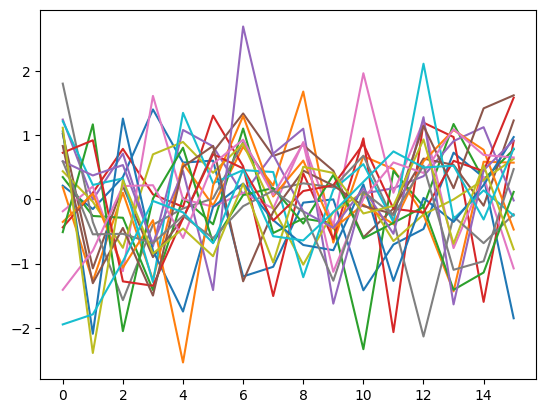

In [30]:
import matplotlib.pyplot as plt

last_epoch = EPOCHS - 1

if last_epoch in Y_dict and last_epoch in y_hat_dict:
    plt.plot(Y_dict[last_epoch][:100])
    plt.plot(y_hat_dict[last_epoch][:100] * 50, 'r--')  # Уточните, что вы хотите сделать с * 50
    plt.show()
else:
    print(f"Данные для эпохи {last_epoch} отсутствуют.")


Pиc. 13,10. Более наглядное сравнение фактических значений доходности за период тестирования (сплошная кривая) и спрогнозированных нейронной сетью величин (пунктирная линия). При столь низкой корреляции вероятность распознавания ложных шаблонов чрезвычайно высока. Здесь количественные показатели оказываются полезнее визуальной оценки зашумленных финансовых данных

Если изучали обзорные статьи об использовании глубокого обучения для анализа финансовых временных рядов, то вас ожидает сильное разочарование. Например, скорее всего, вам знакомы свидетельства того, что применение простой многослойной сети LSTM к дневным данным о ценах на акции
позволяет получить прогнозы, практически идентичные фактическим данным
фондового рынка — даже вне выборки. Существуют две важные причины,
по которым такие результаты могут только выглядеть хорошо, но не
являться таковыми на самом деле.

• Предварительная обработка кода, заключающаяся в его масштабировании
с помощью специализированного готового решения, такого как sklearn.
preprocessing.MinMaxScaler. Это не идеальный вариант, поскольку он
предопределяет упреждение, вызванное масштабированием на данных за
весь временной период.

• Прогнозирование цены, а не доходности. Это гораздо более простая задача — для начала отличным прогнозом цены в день Т + 1 является цена в день Г. Таким образом, легко построить модель, которая, по-видимому, достаточно хорошо прогнозирует цену и создает впечатляющие графики.
К сожалению, такие модели не могут быть использованы для достижения успеха в биржевых торгах.
Мы попытались рассмотреть более реалистичный пример, показывающий, что задача намного сложнее, а графики не такие уж и хорошие, как кажется.


***Вопросы производительности***

В рассмотренном примере использована стандартная сеть LSTM tf .nn.rnn_cell. LSTMCell — не в последнюю очередь потому, что это универсальный рабочий инструмент. Кроме того, она хорошо подходит под наши цели, поскольку выполнение используемого кода не требует задействования графического процессора, и вы можете запускать его даже на стандартном ноутбуке.

Если ваш компьютер оснащен мощным графическим процессором, то обратитесь к программному интерфейсу cuDNN компании NVIDIA, который представляет адстройку для ее аппаратного обеспечения, поддерживающую работу с двумя основными вариантами стандартной сети RNN: LSTM и GRU. Если у вас стандартный графический процессор компании NVIDIA, то, скорее всего, обучение модели будет выполняться намного быстрее, чем в стандартной реализации.

Предложенное решение доступно в фреймворке TensorFlow, а также в некоторых других популярных пакетах глубокого обучения. Принципы его построения схожи с применяемыми нами, за исключением использования другой архитектуры RNN.

Этот совет может потерять свою актуальность после выпуска компанией Google процессоров TPU и других специализированных аппаратных решений для глубокого обучения.

Излишне говорить, что полный анализ производительности модели не завершен. Мы выяснили, как правильно строить модели для прогнозирования, на что нужно обращать внимание и как сделать так, чтобы модель глубокого обучения оправдала излишнюю сложность по сравнению с линейной моделью.

Существует множество способов повысить точность модели, которые следует рассматривать как советы по модификации кода ее реализации.

• Добавить больше входных данных из необработанных данных путем создания дополнительных признаков на основе таких входных данных. Мы использовали не все столбцы необработанных входных данных, и существуют другие способы представления целевых величин. Рассмотрите категориальные переменные, описываемые вопросом «Совпадают ли максимальные или минимальные дневные цены с моментами открытия или закрытия торгов?» (Для проверки нужно использовать несколько бинарных условий.)

• Интегрировать параллельные временные ряды для других акций. Это предоставит дополнительную информацию и данные для обучения.

• Использовать данные в разных временных масштабах. В одном широко цитируемом документе, посвященном такому подходу, описывается специально разработанная архитектура ClockworkRNN (https://perma.cc/9C62-7GFK).

• Дополнить входные данные, используя существующие примеры временных рядов и добавляя флуктуации. Это поможет расширить набор данных.

• Позволить сетевой архитектуре расти при увеличении объема входных данных. Более сложная архитектура не всегда равнозначна высокой точности прогнозирования, но оказывается целесообразной, когда текущая сеть работает на пределе.

• Попробовать обучать данные в хронологическом порядке, а не методом циклического перебора несколько раз за эпоху. Иногда это оказывается весьма действенным (зависит от набора данных). Учитывая изменение поведения временных рядов во времени, лучше закончить обучение на последних данных, чтобы отобразить измененное поведение в весах.

• Рассмотреть различные функции потерь. Мы использовали норму L2, которая имеет тенденцию штрафовать большие различия намного сильнее, чем малые. Однако, учитывая предметную область, успех можно оценивать по-разному. Возможно, нужно всего лишь предсказать знак ежедневной доходности и не беспокоиться о его величине. В этом случае рассмотрите возможность применения целевых направлений в качестве категориальных переменных: положительное, отрицательное, ноль. В случае использования категориальных данных обычно рассматривается кросс-энтропийная мера потерь. Однако, учитывая, что предложенные данные ранжируются (ноль ближе к отрицательному значению, чем положительное значение к отрицательному) и их нельзя считать полностью категориальными, рассмотрите вариант применения пользовательской функции потерь, чтобы отобразить этот факт.

• Подумать о создании множества простых нейронных сетей, а не одной. Поддерживайте маленькой каждую отдельную сеть. Ансамбли оказываются полезными для данных с низким отношением “сигнал/шум”, в частности для финансовых данных.

• Определить, почему шкала прогнозов сильно отличается от шкалы фактических значений. Начните с оценки того, является ли используемая функция потерь проблематичной, учитывая сильное преобладание дневной доходности с нулевым значением.

Как видите, существует множество способов повысить точность сети или расширить ее возможности. То, как это правильно сделать, зависит от набора данных. Не пренебрегайте визуализацией полученных сетью результатов, изучайте предметную область и предельно точно очерчивайте целевые задачи (в данном случае, скорее всего, максимизация доходности). В противном случае вы легко потеряетесь в невероятном разнообразии доступных вариантов.
